# Createing the microcat datasets
one dataset for EB and one for WB -› save as NetCDF

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, YearLocator
import xarray as xr
import cmocean as cm
import marineHeatWaves as mhw
from datetime import date

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Load Data

In [3]:
# EB
file_name = "data/rteb1_all_merged.nc"
ds_eb = xr.open_dataset(file_name)
file_name = "data/rteb1_oxy_all_merged.nc"
ds_ox = xr.open_dataset(file_name)

In [4]:
# WB
file_name = "data/rtwb1_all_merged.nc"
ds_wb1 = xr.open_dataset(file_name)
file_name = "data/rtwb2_all_merged.nc"
ds_wb2 = xr.open_dataset(file_name)

# EB

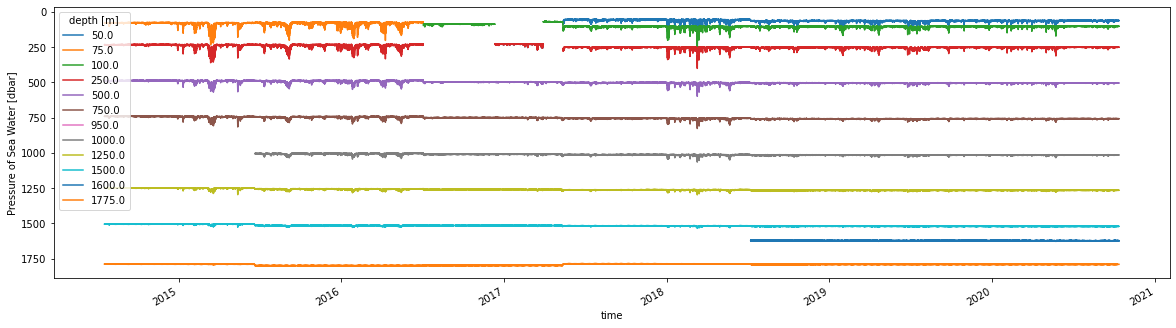

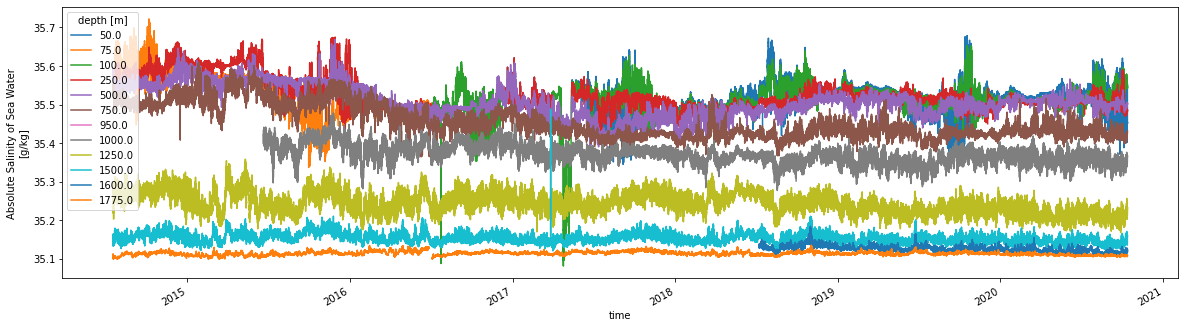

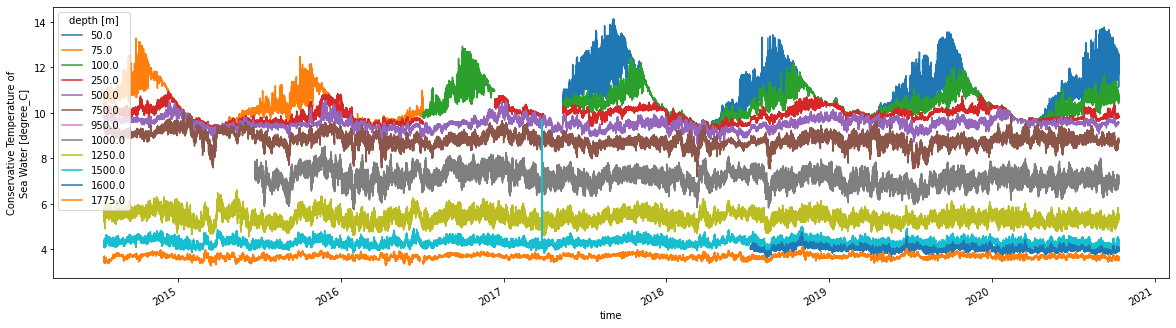

In [5]:
ds_eb.pres.plot.line(x='time', figsize = (20,5), yincrease = False); #.where(ds.pres>0);
ds_eb.sal.where(ds_eb.sal>0).plot.line(x='time', figsize = (20,5));
ds_eb.temp.plot.line(x='time', figsize = (20,5));

# focus on salinity

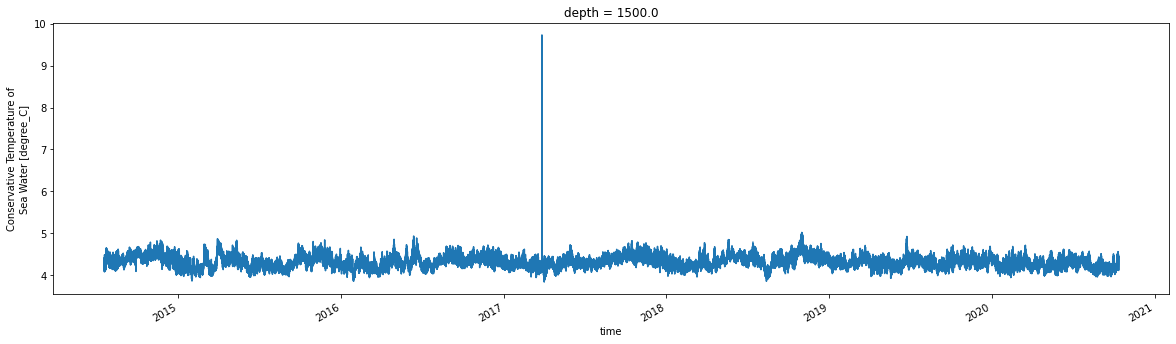

In [6]:
ds_eb.temp.sel(depth=1500).plot.line(x='time', figsize = (20,5));

In [7]:
# ds_eb1500 = ds_eb.sel(depth = 1500)
# ds_eb1500t = ds_eb1500.temp.where(ds_eb.temp.sel(depth = 1500)<5)

# ds_eb1500 = ds_eb1500.drop_vars('temp')
# ds_eb1500 = xr.merge([ds_eb1500, ds_eb1500t])

In [8]:
#ds_eb = ds_eb.drop_sel(depth=1500)

In [9]:
#ds_eb = xr.concat([ds_eb, ds_eb1500], dim = 'depth')

## Create mask file to get rid bad data BEFORE resampling

Forget what I said about keeping the mask file in the resampled data. We want to get rid of the bad before we do the resampling because we do not want the bad data to falsify the 1D data. I.e. in the 1D data we only use good data and no mask is required any more. I use a numpy array instead xarray to manipulate only the first colum of the array (which is not possible in xarray...). I think the is the best way to do it.

In [10]:
mask=(ds_eb.pres>0) & (ds_eb.pres.notnull()) & (ds_eb.temp.sel(depth = 1500)<5)
mask = mask.values
mask[0] = ds_eb.sel(depth=50).pres<200
ds_eb = ds_eb.where(mask)

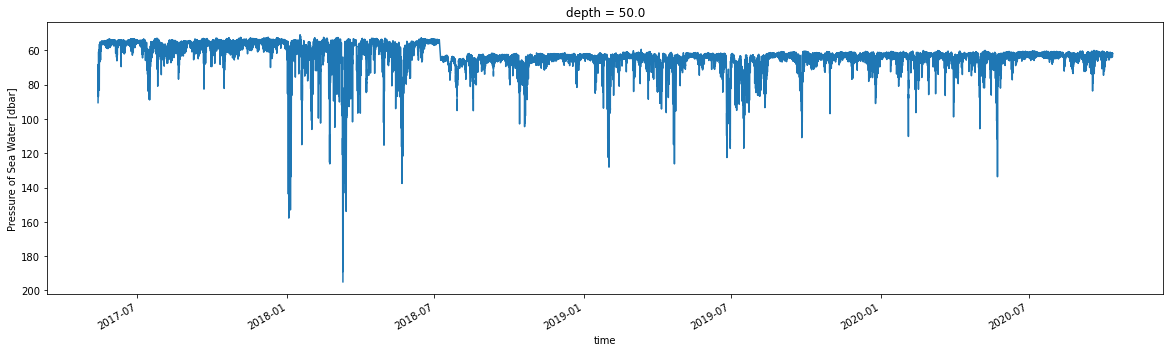

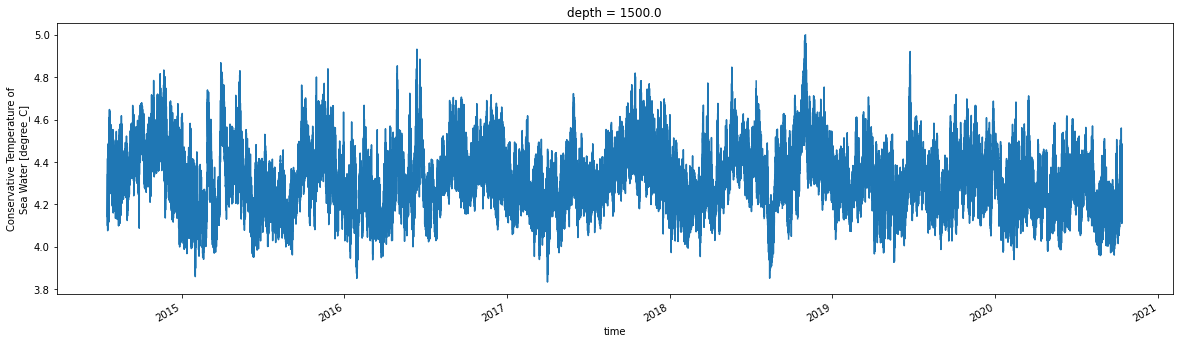

In [11]:
ds_eb.pres.sel(depth=50).plot.line(x='time', figsize = (20,5), yincrease = False);
ds_eb.temp.sel(depth=1500).plot.line(x='time', figsize = (20,5));

In [13]:
ds_eb = ds_eb.resample(time = "1D").mean(keep_attrs=True);
ds_ox = ds_ox.resample(time = "1D").mean(keep_attrs=True)

In [14]:
ds_eb = xr.concat([ds_eb, ds_ox], dim = 'moor')

In [15]:
ds_eb = ds_eb.mean('moor', keep_attrs=True)

In [16]:
ds_eb

<xarray.Dataset>
Dimensions:  (depth: 12, time: 2279)
Coordinates:
  * depth    (depth) float64 50.0 75.0 100.0 250.0 ... 1.5e+03 1.6e+03 1.775e+03
  * time     (time) datetime64[ns] 2014-07-18 2014-07-19 ... 2020-10-12
Data variables:
    oxy      (time, depth) float64 nan nan nan nan nan ... nan nan nan nan nan
    temp     (time, depth) float64 nan 10.45 nan 9.842 ... 5.43 4.29 3.961 3.6
    pres     (time, depth) float64 nan 78.23 nan ... 1.623e+03 1.79e+03
    sal      (time, depth) float64 nan 35.56 nan 35.56 ... 35.15 35.12 35.11
Attributes:
    Mooring:          rteb1
    WaterDepth:       1800
    Start_Date:       2014/07/18
    Start_Time:       12:30
    End_Date:         2015/06/20
    End_Time:         06:30
    Latitude:         57.099333333333334
    Longitude:        -9.548
    Latitude_units:   degrees_north
    Longitude_units:  degrees_east

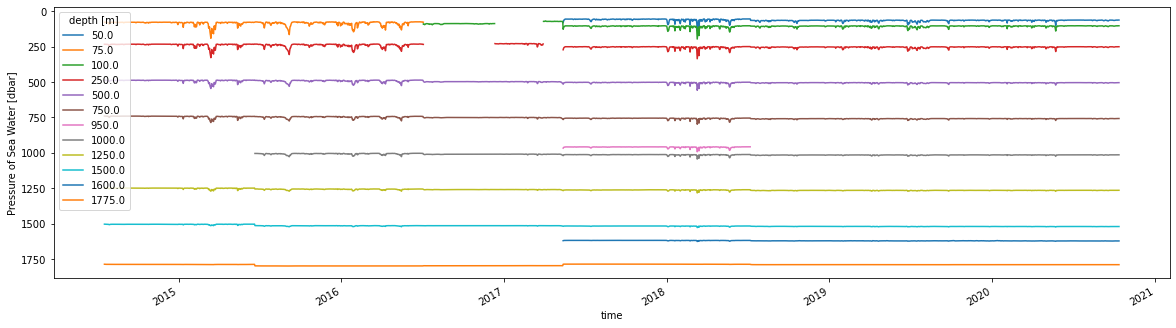

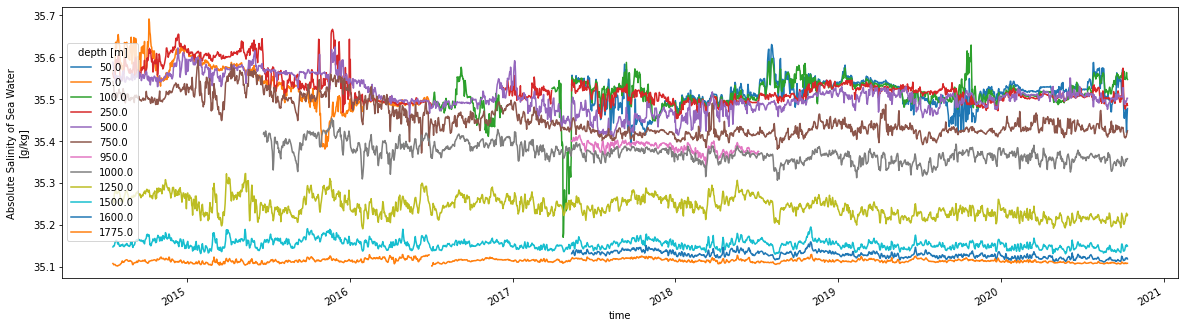

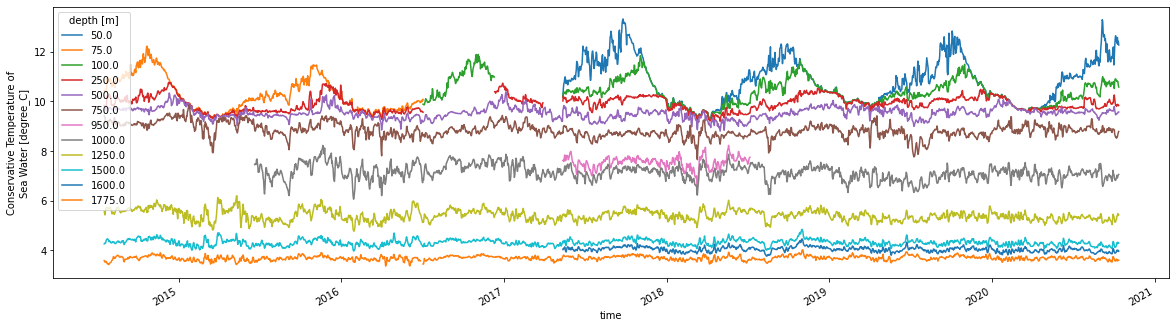

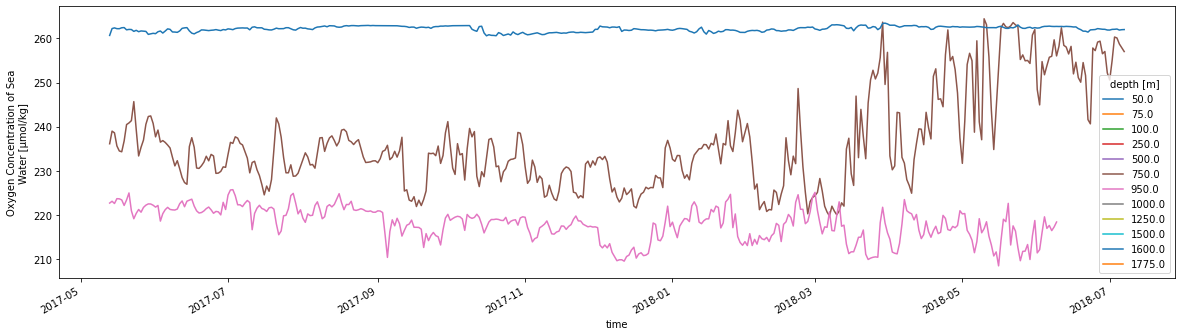

In [17]:
ds_eb.pres.plot.line(x='time', figsize = (20,5), yincrease = False); #.where(ds.pres>0);
ds_eb.sal.plot.line(x='time', figsize = (20,5));
ds_eb.temp.plot.line(x='time', figsize = (20,5));
ds_eb.oxy.plot.line(x='time', figsize = (20,5));

## EB NetCDF

In [18]:
#ds_eb.to_netcdf('data/rteb_all_1D.nc', 
#       engine='netcdf4',
#       encoding={'time':{'units':'days since 1900-01-01 00:00:00'}})

# WB

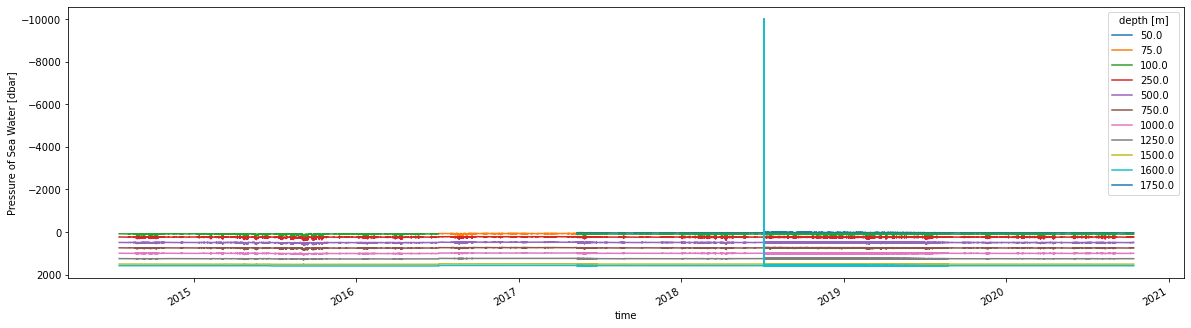

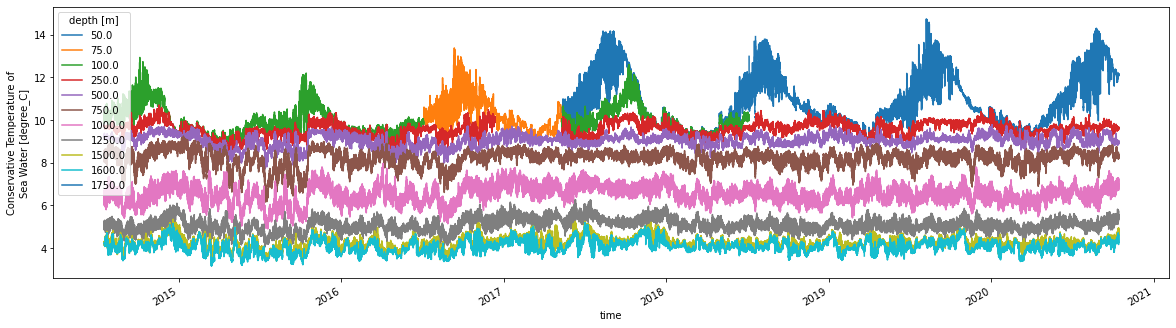

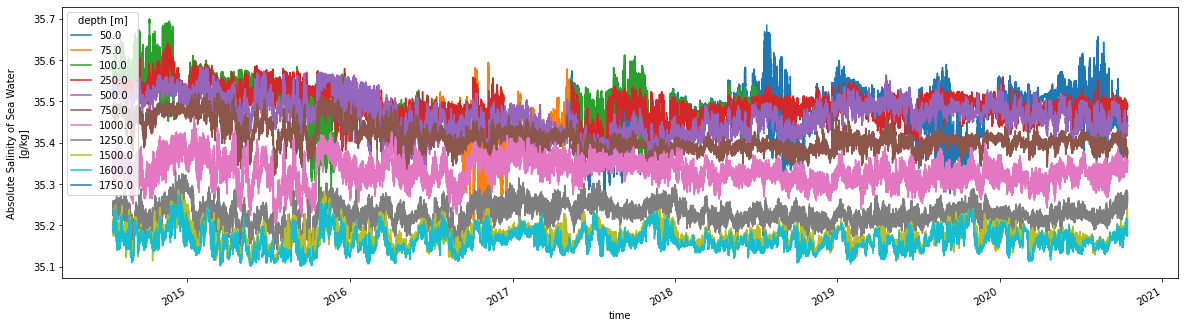

In [19]:
ds_wb1.pres.plot.line(x='time', figsize = (20,5), yincrease = False); # remove spike
ds_wb1.temp.plot.line(x='time', figsize = (20,5));
ds_wb1.sal.plot.line(x='time', figsize = (20,5));
#remove pressure spike

In [20]:
ds_wb1 = ds_wb1.where(ds_wb1.pres>0)

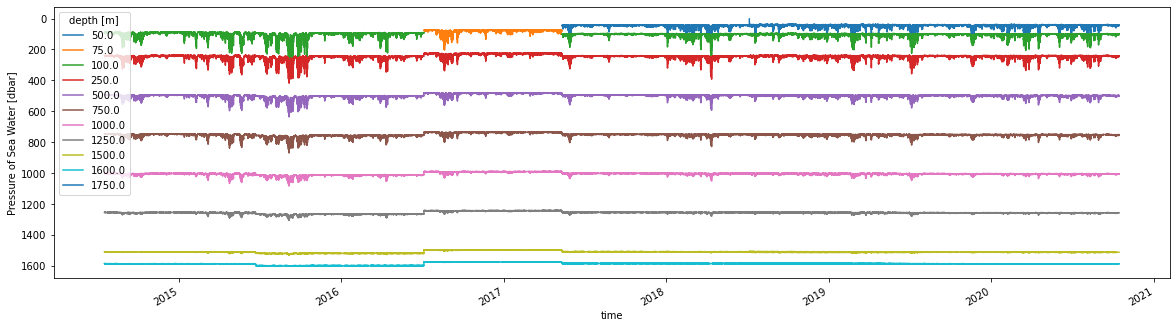

In [21]:
ds_wb1.pres.plot.line(x='time', figsize = (20,5), yincrease = False);

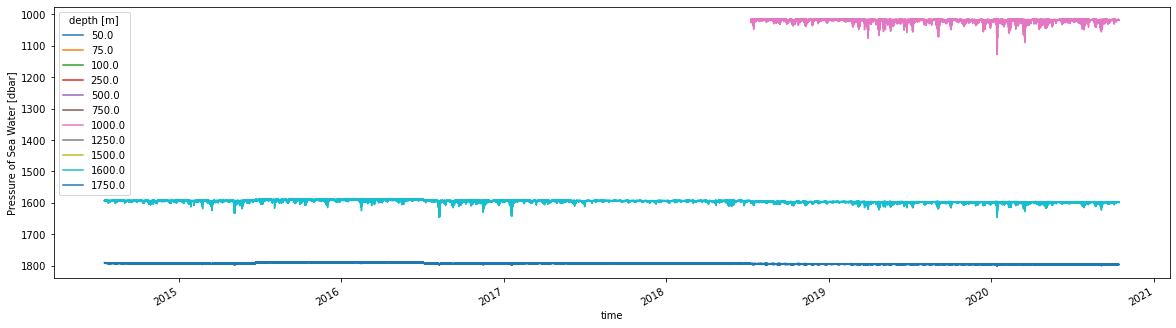

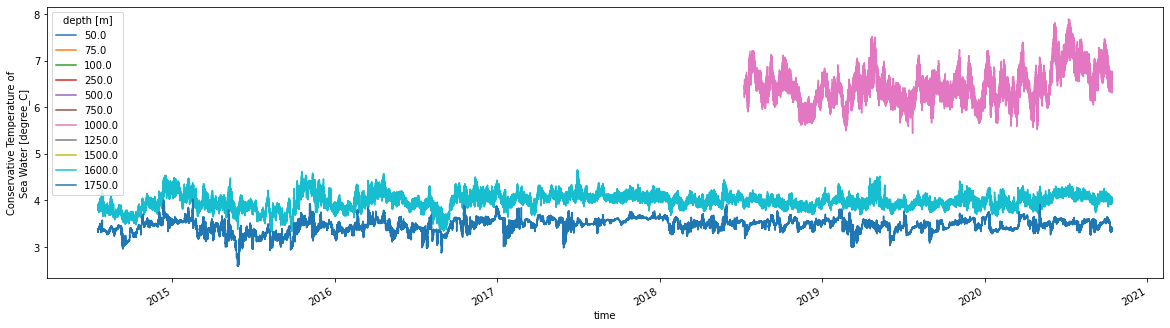

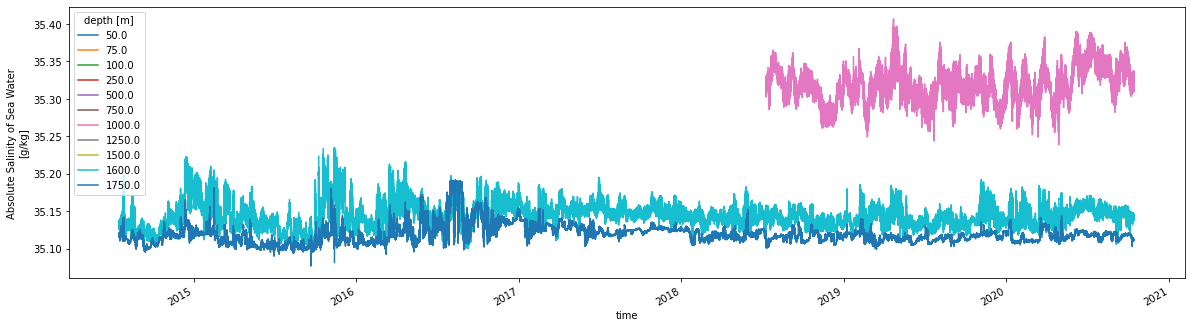

In [22]:
ds_wb2.pres.plot.line(x='time', figsize = (20,5), yincrease = False); #.where(ds.pres>0);
ds_wb2.temp.plot.line(x='time', figsize = (20,5));
ds_wb2.sal.plot.line(x='time', figsize = (20,5));
# this looks good

In [23]:
ds_wb1 = ds_wb1.resample(time = "1D").mean(keep_attrs=True);
ds_wb2 = ds_wb2.resample(time = "1D").mean(keep_attrs=True);

In [24]:
ds_wb = xr.concat([ds_wb1, ds_wb2], dim='moor')

In [25]:
ds_wb = ds_wb.mean('moor', keep_attrs=True)

In [26]:
ds_wb

<xarray.Dataset>
Dimensions:  (depth: 11, time: 2282)
Coordinates:
  * time     (time) datetime64[ns] 2014-07-17 2014-07-18 ... 2020-10-14
  * depth    (depth) float64 50.0 75.0 100.0 250.0 ... 1.5e+03 1.6e+03 1.75e+03
Data variables:
    temp     (time, depth) float64 nan nan 10.05 9.724 ... 4.854 4.183 3.357
    pres     (time, depth) float64 nan nan 89.7 ... 1.594e+03 1.796e+03
    sal      (time, depth) float64 nan nan 35.56 35.55 ... 35.23 35.17 35.11
Attributes:
    Mooring:          rtwb1
    WaterDepth:       1600
    Start_Date:       2014/07/17
    Start_Time:       12:30
    End_Date:         2015/06/22
    End_Time:         10:30
    Latitude:         57.470666666666666
    Longitude:        -12.705
    Latitude_units:   degrees_north
    Longitude_units:  degrees_east

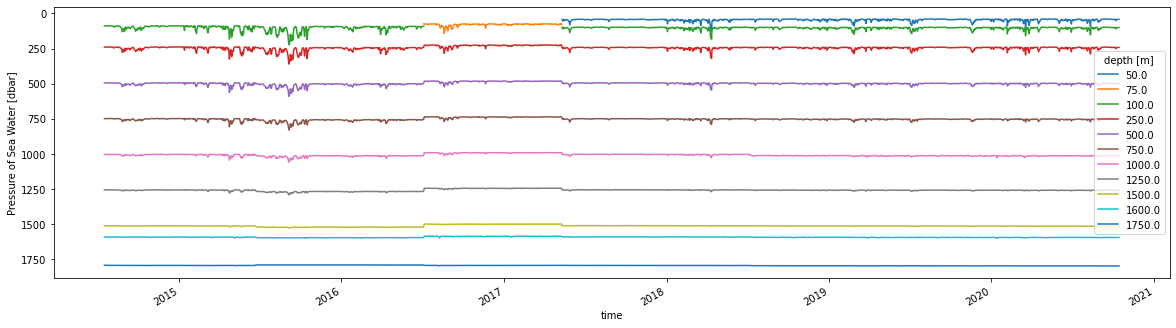

In [27]:
ds_wb.pres.plot.line(x='time', figsize = (20,5), yincrease = False);

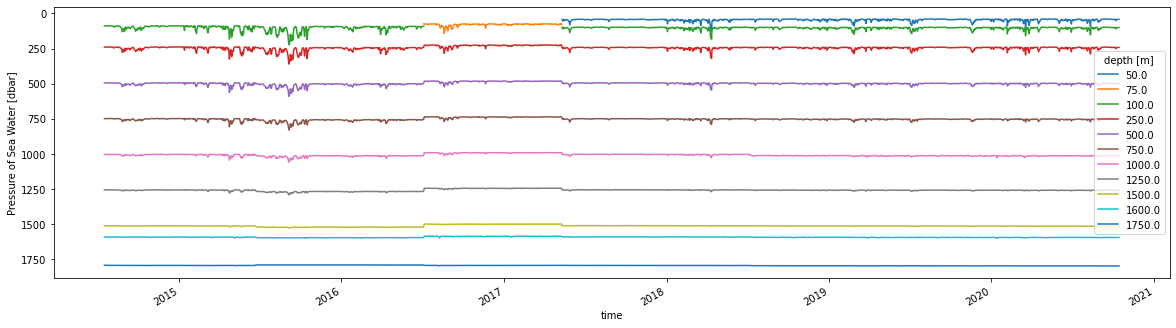

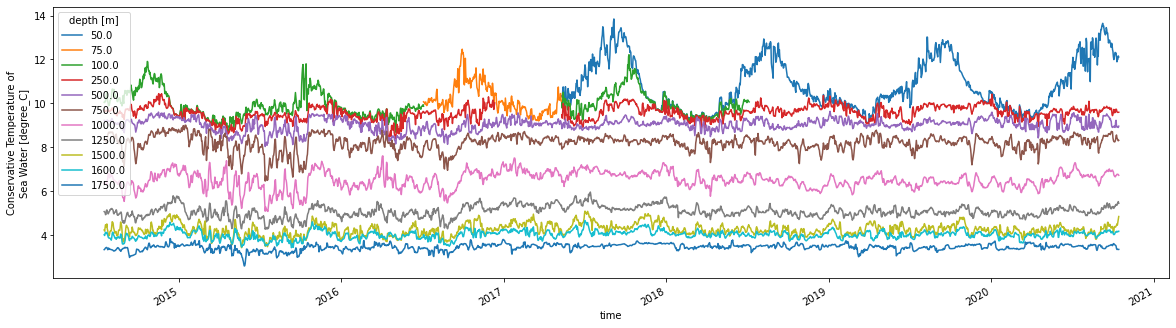

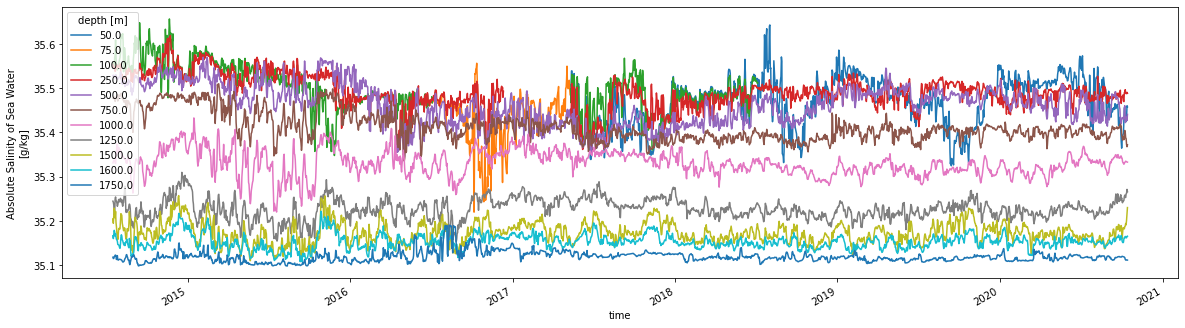

In [28]:
ds_wb.pres.plot.line(x='time', figsize = (20,5), yincrease = False);
ds_wb.temp.plot.line(x='time', figsize = (20,5));
ds_wb.sal.plot.line(x='time', figsize = (20,5));

## WB NetCDF

In [29]:
#ds_wb.to_netcdf('data/rtwb_1D.nc', 
#        engine='netcdf4',
#        encoding={'time':{'units':'days since 1900-01-01 00:00:00'}})